In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-house-price/realest.csv


In [90]:
# import lib & package

from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [91]:
# create scrollable table for better visualization of table
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

# Chicago House Price 

#### Task:  first analysis the data ,and then to apply a regression model to it.

<span style="color:black;font-weight:700;font-size:16px">
1. EDA (Exploratory data analysis)
</span>

In [92]:
df = pd.read_csv('/kaggle/input/chicago-house-price/realest.csv')
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


#### DATA OVERVIEW:
dataset consists of following variables:

**Price :** price of house  
**Bedroom:** number of bedrooms  
**Room:** number of rooms  
**Space :** size of house (in square feet)  
**Lot :** width of a lot  
**Tax :** amount of annual tax  
**Bathroom :** number of bathrooms  
**Garage :** number of garage  
**Condition:** condition of house (1 if good , 0 otherwise)  

#### Check data shape and type first,

In [93]:
df.shape

(157, 9)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


##### There are 157 rows with 9 columns and every column's data type is float.

#### Find counts and percentage of any missing values for each column 

In [95]:
print(df.isna().sum(axis=0))
print(df.isna().sum(axis=0)*100.00/len(df))

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64
Price        0.636943
Bedroom      0.636943
Space        7.006369
Room         0.636943
Lot          7.006369
Tax          6.369427
Bathroom     0.636943
Garage       0.636943
Condition    0.636943
dtype: float64


##### Space and Lot has the most missing values ~ 7%. I decide to drop these missing values. 

In [96]:
df1 = df.dropna(axis=0)

In [97]:
df1.isna().sum(axis=0)

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [98]:
df1.shape

(128, 9)

#### Check Duplicate

In [99]:
df1.duplicated().sum()

0

##### The new dataset after dropping missing values has the size of (128, 9) and there is no duplicate.

In [100]:
html_table = create_scrollable_table(df1, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_table))

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
5,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
7,70.0,3.0,2261.0,6.0,29.0,2700.0,1.0,2.0,0.0
9,82.0,4.0,2104.0,9.0,40.0,1038.0,2.5,1.0,1.0
10,85.0,8.0,2240.0,12.0,50.0,1200.0,3.0,2.0,0.0
11,45.0,2.0,641.0,5.0,25.0,860.0,1.0,0.0,0.0


#### Look at boxplot to check outliers

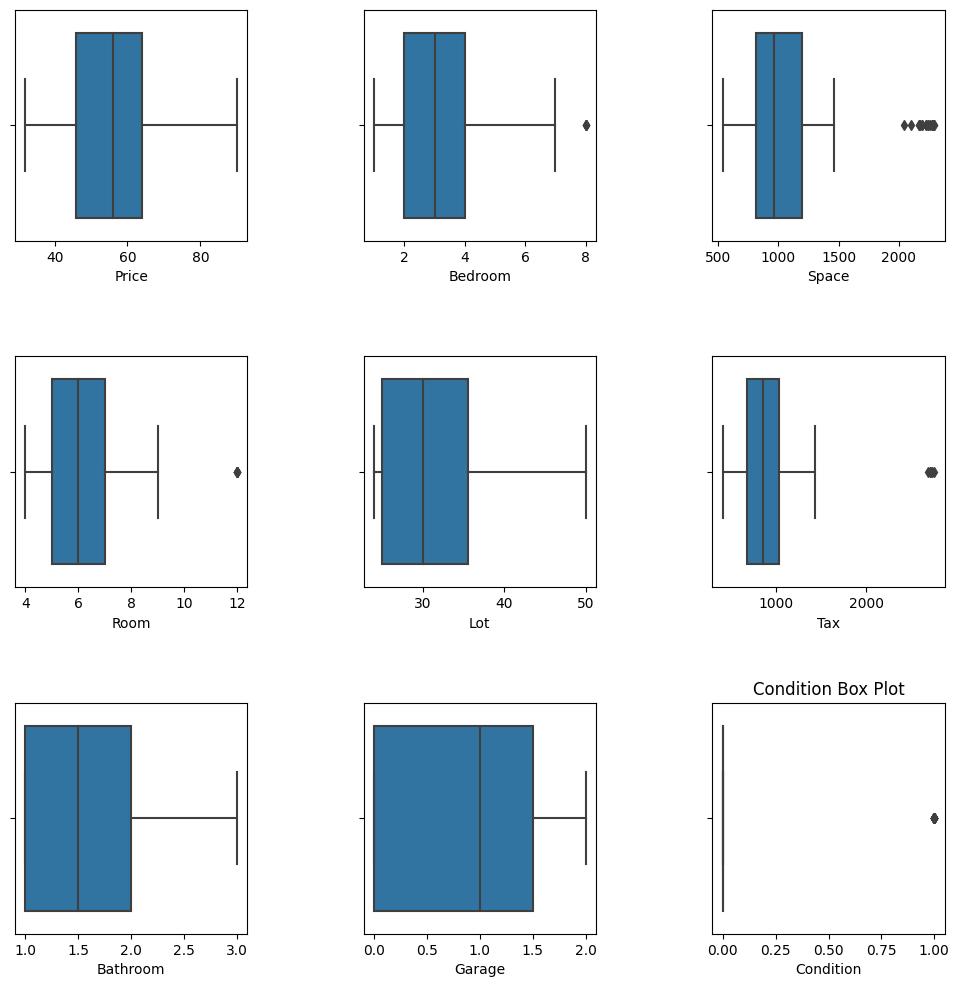

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(12,12))
for col, ax in zip(df1.columns, axes.flat):
    sns.boxplot(data = df1, x= col, ax=ax)
    plt.title(col + " Box Plot")
    
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

##### Check outliers for Space, Bed Room, Room, and Tax 

In [102]:
html_table = create_scrollable_table(df1.sort_values(by='Tax', ascending=False), 'numerical_features', 'Sort by Highest Tax to Lowest')
display(HTML(html_table))

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
111,73.0,3.0,2287.0,6.0,29.0,2752.0,1.0,2.0,0.0
33,70.0,3.0,2230.0,6.0,29.0,2727.0,1.0,2.0,0.0
137,70.0,2.0,2196.0,6.0,29.0,2711.0,1.0,2.0,0.0
7,70.0,3.0,2261.0,6.0,29.0,2700.0,1.0,2.0,0.0
59,70.0,2.0,2191.0,6.0,29.0,2688.0,1.0,2.0,0.0
122,63.0,2.0,933.0,5.0,30.0,1431.0,1.0,1.0,0.0
44,64.0,2.0,898.0,5.0,30.0,1394.0,1.0,1.0,0.0
96,67.0,2.0,901.0,5.0,30.0,1373.0,1.0,1.0,0.0
18,66.0,2.0,929.0,5.0,30.0,1355.0,1.0,1.0,0.0
70,69.0,1.0,907.0,5.0,30.0,1320.0,1.0,1.0,0.0


#### Look at pairplot 

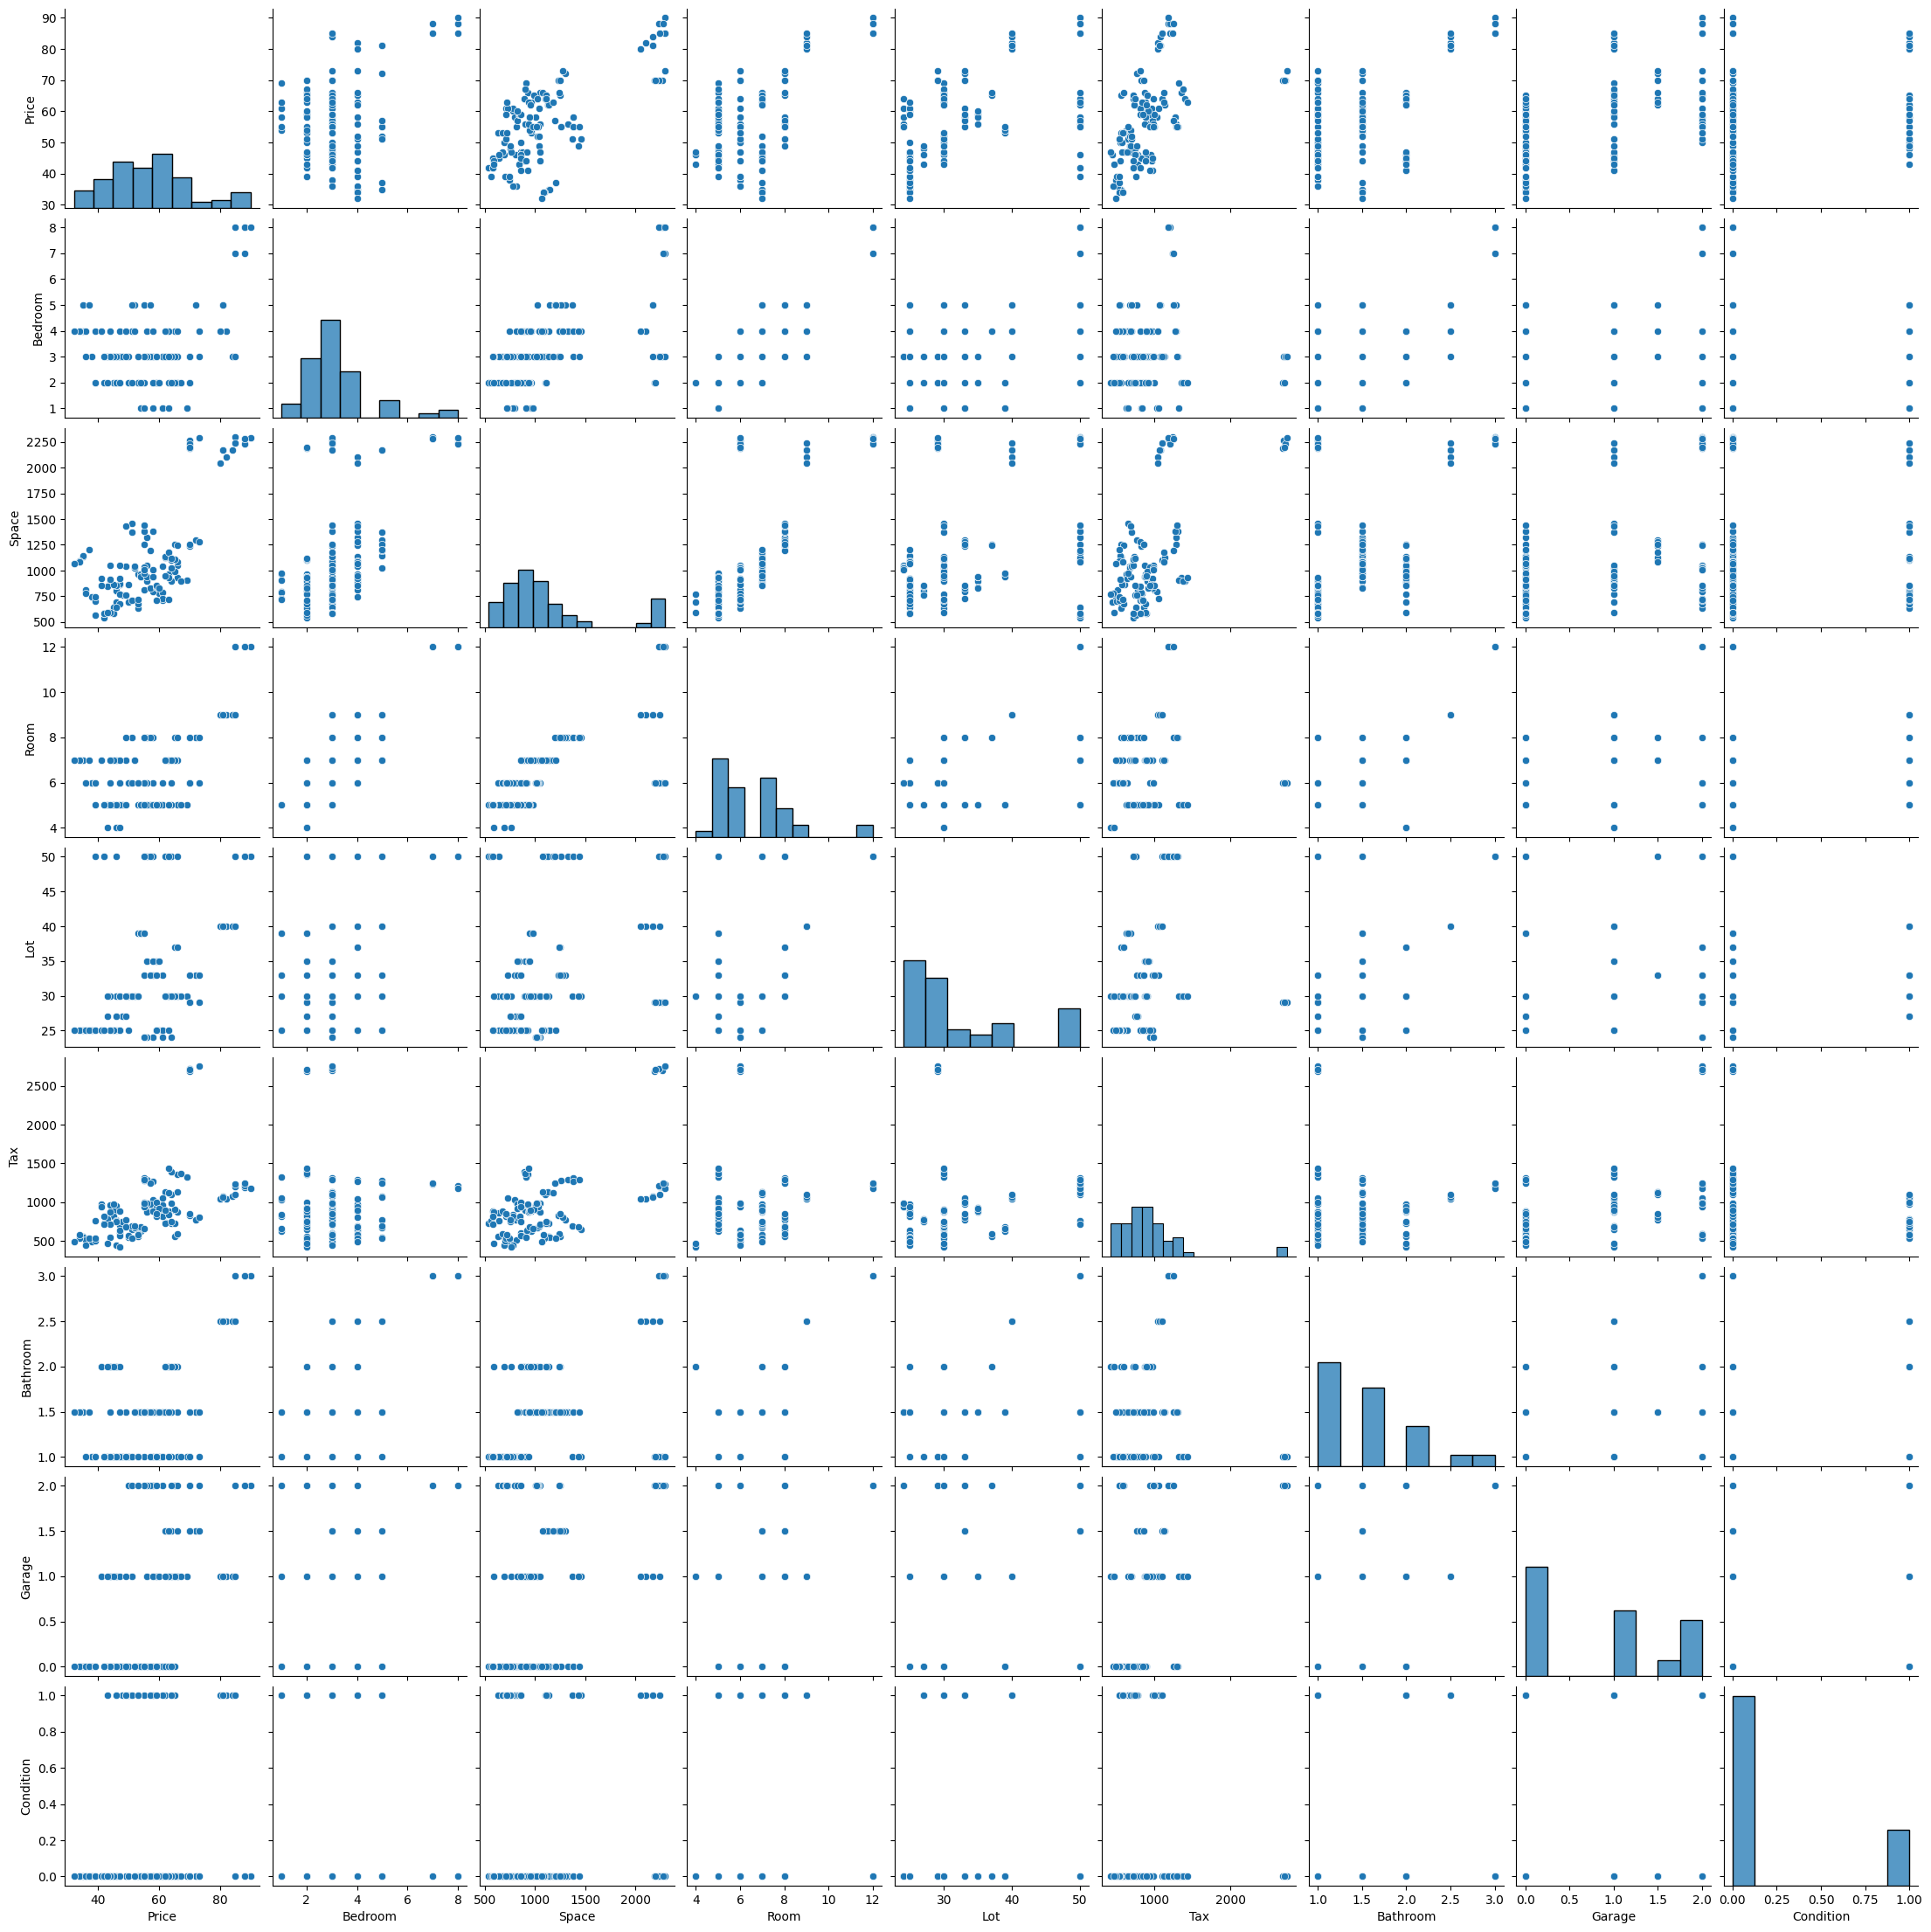

In [103]:
sns.pairplot(df1)

#### Condition is not numerical so change to categorical

In [104]:
df1['Condition'] = df1['Condition'].astype('str')

#### Check Pairplot by condition 

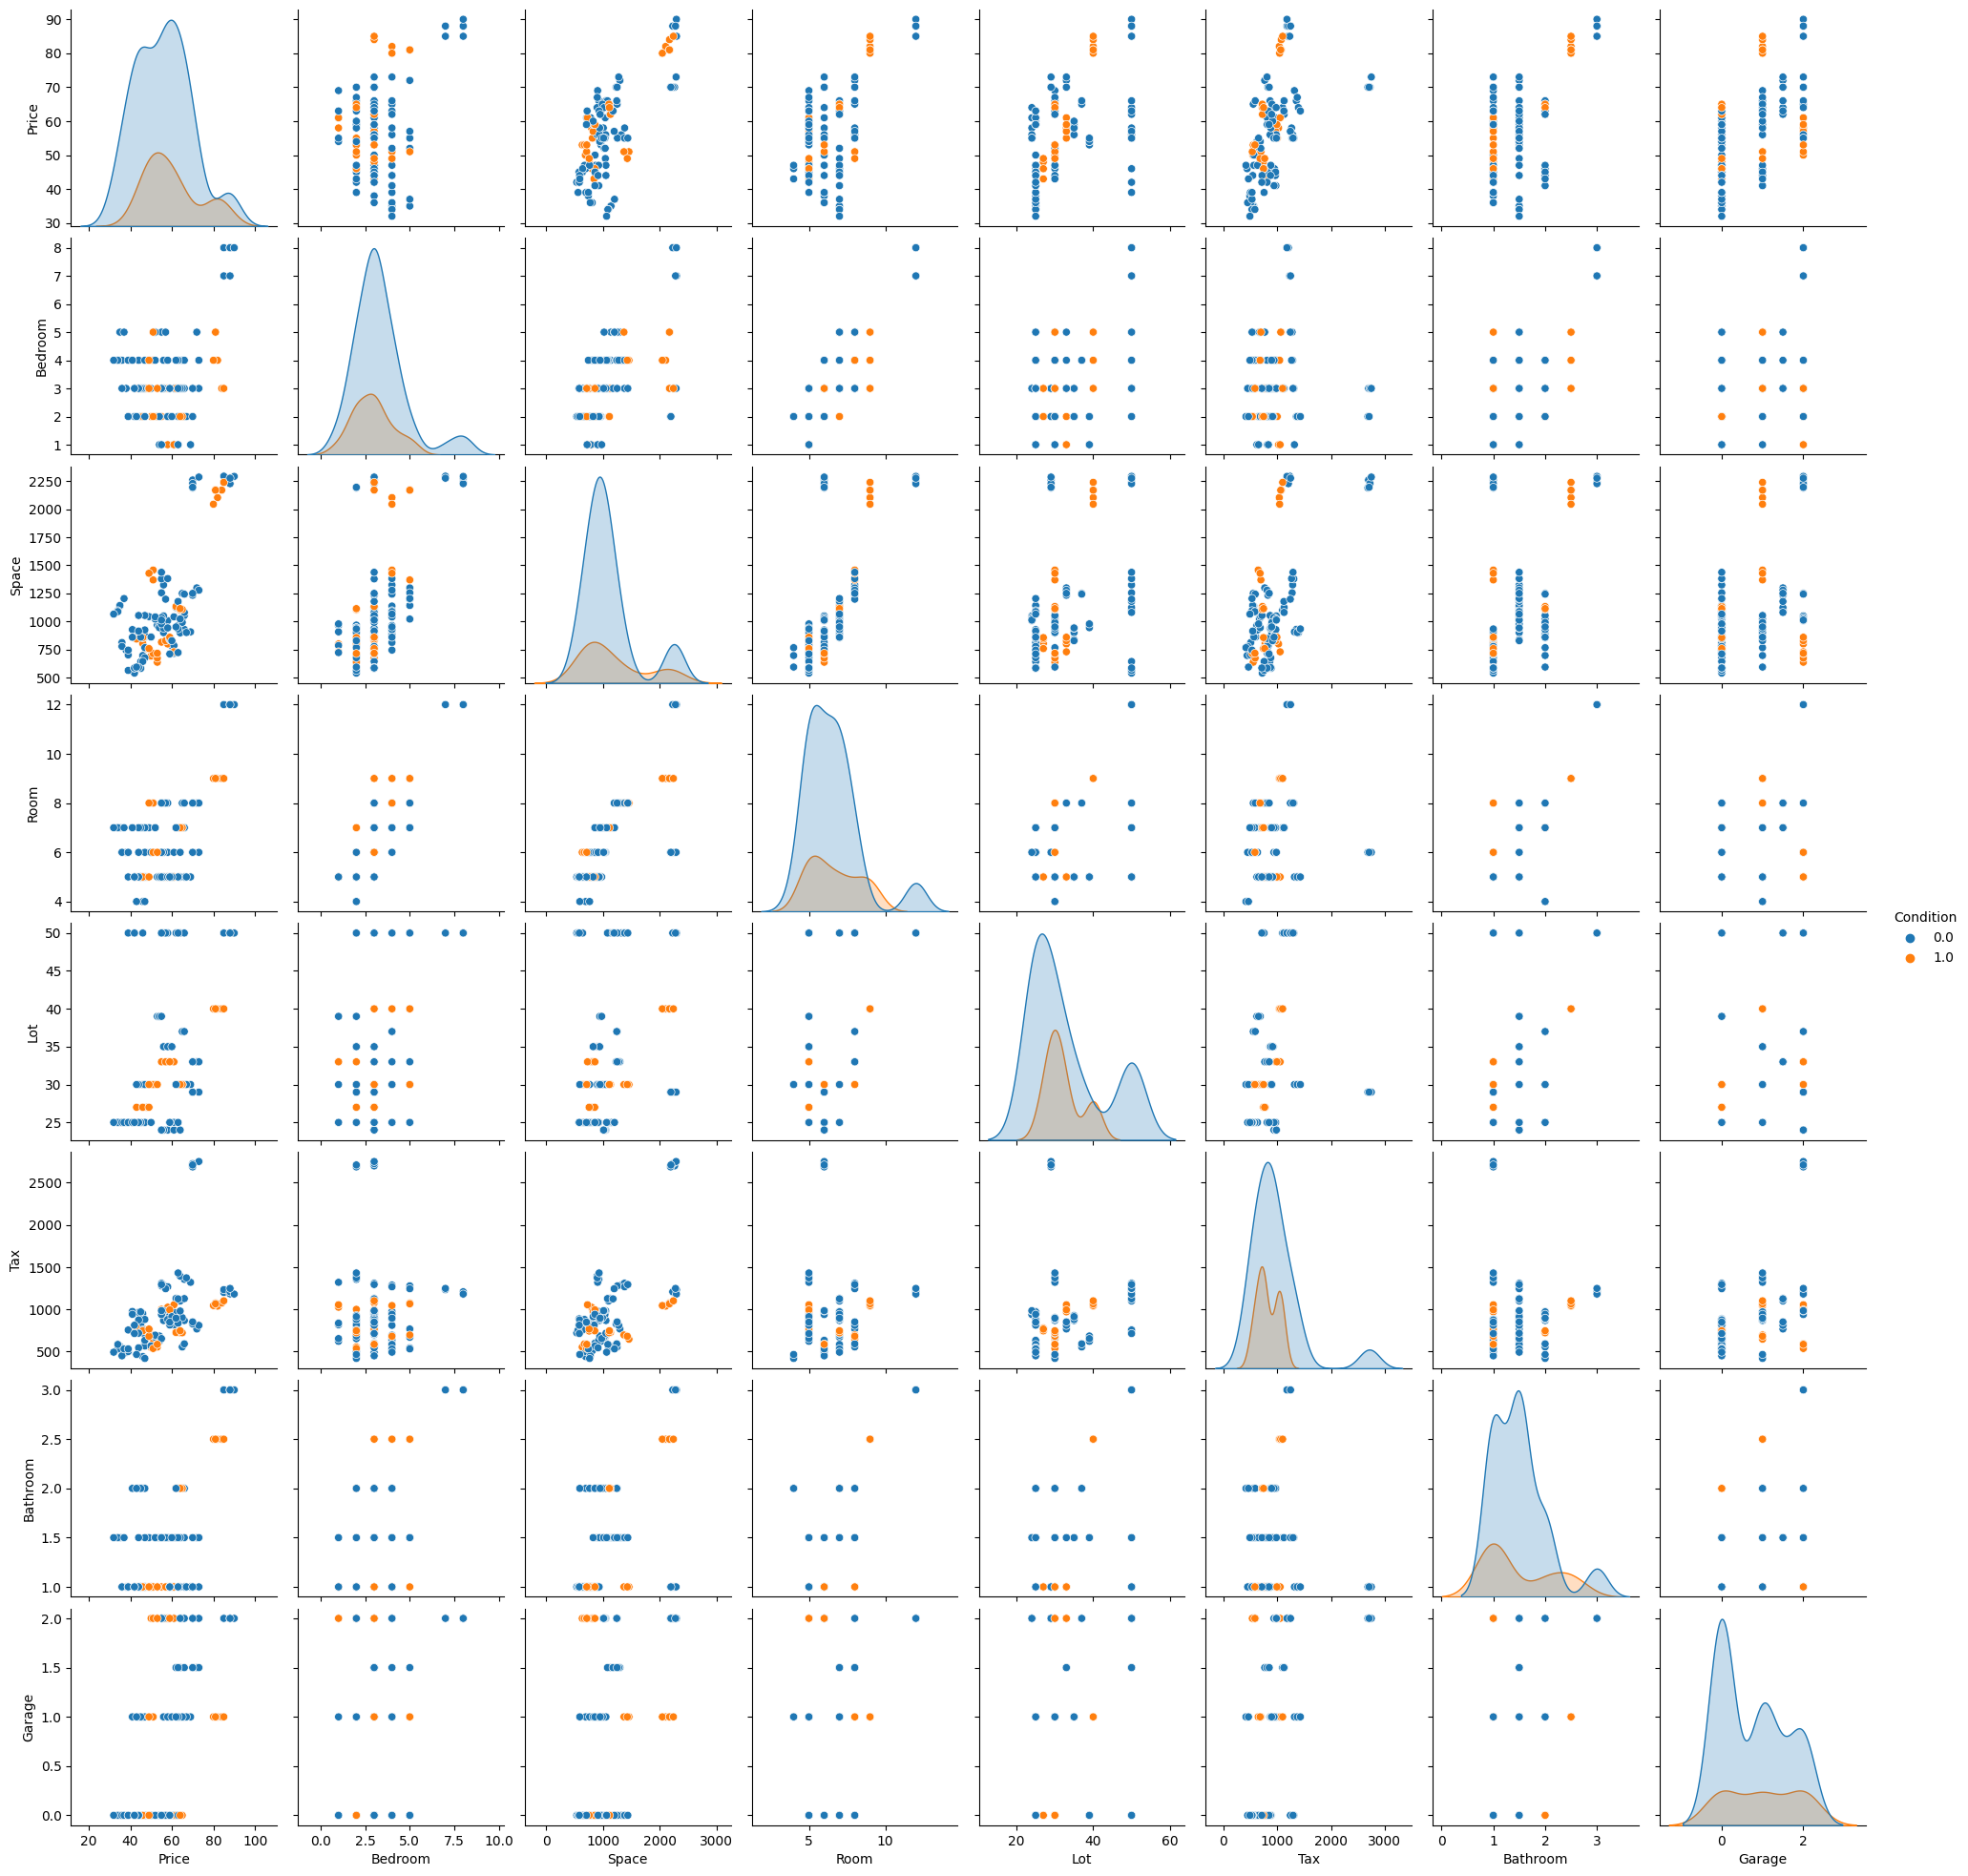

In [105]:
sns.pairplot(df1, vars=df1.columns[:-1], hue='Condition')

#### Check dependent variable

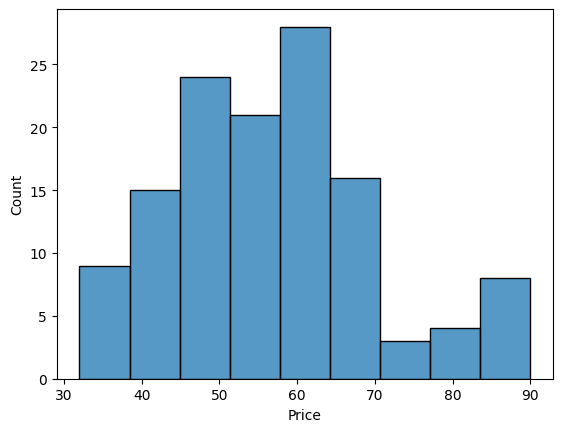

In [106]:
target = df1['Price']
sns.histplot(target);

<span style="color:black;font-weight:700;font-size:16px">
2. Build Model
</span>

#### Training & Testing Set 

In [107]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns= 'Price')
y = target

In [108]:
X.shape, y.shape

((128, 8), (128,))

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#### Creating evaluation Function

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evalutaion(pred, test):
    print("MAE: " , mean_absolute_error(test, pred))
    print("MSE: " , mean_squared_error(test, pred))
    print("R2 : " , r2_score(y_test, y_pred))
    
    return mean_absolute_error(test, pred), mean_squared_error(test, pred), r2_score(y_test, y_pred)

#### For modeling, I am trying few of them.

1. Linear Reg
2. Decision Tree
3. Random Forest
4. XGB Reg

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### Linear Model

In [112]:
lnr = LinearRegression().fit(X_train, y_train)
y_pred = lnr.predict(X_test)

lnr_mae, lnr_mse, lnr_r2 = evalutaion(y_pred, y_test)

MAE:  6.370494814436124
MSE:  57.580070224649745
R2 :  0.6994740003716551


#### Decision Tree

In [113]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [114]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)

In [115]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50]}
dct = DecisionTreeRegressor()
clf = GridSearchCV(dct, tree_para, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50]},
             scoring='neg_mean_squared_error', verbose=2)

In [116]:
print(clf.best_estimator_)

DecisionTreeRegressor(max_depth=40)


In [117]:
dct=DecisionTreeRegressor(max_depth=30).fit(X_train, y_train)
d_pred = dct.predict(X_test)
d_mae, d_mse, d_r2 = evalutaion(d_pred, y_test)

MAE:  3.423076923076923
MSE:  23.03846153846154
R2 :  0.6994740003716551


#### Random Forest

In [118]:
forest_para = {
        'n_estimators': [10, 20, 50,100],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    }

In [119]:
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, forest_para,  cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [120]:
print(clf.best_estimator_)

RandomForestRegressor(max_depth=30)


In [121]:
rfr = RandomForestRegressor(max_depth=30).fit(X_train, y_train)
r_pred = rfr.predict(X_test)
r_mae, r_mse, r_r2 = evalutaion(r_pred, y_test)

MAE:  2.6803846153846163
MSE:  9.612465384615387
R2 :  0.6994740003716551


#### XBG Boost

In [122]:
XGB_para = {
        'n_estimators': [100, 200, 500, 1000, 1500],
        'learning_rate': [0.01, 0.1, 0.3, 1, 10],
        'max_depth': [3, 5, 7, 9,12],
    }

In [123]:
df2 = pd.get_dummies(df1)

In [124]:
X2 = df2.drop(columns='Price')
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state= 42)

In [125]:
xgb = XGBRegressor()
clf = GridSearchCV(xgb, XGB_para,  cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
clf.fit(X2_train, y2_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=6; total time=   0.0s
[CV] END ........................................max_depth=7; total time=   0.0s
[CV] END ........................................max_depth=7; total time=   0.0s
[CV] END ........................................max_depth=8; total time=   0.0s
[CV] END ........................................max_depth=9; total time=   0.0s
[CV] END .......................................max_depth=11; total time=   0.0s
[CV] END .......................................max_depth=12; total time=   0.0s
[CV] END .......................................max_depth=20; total time=   0.0s
[CV] END .....................................

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................max_depth=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_dep

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 1, 10],
                         'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [100, 200, 500, 1000, 1500]},
             scoring='neg_mean_squared_error', verbose=2)

In [126]:
print(clf.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [127]:
xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators= 200).fit(X2_train, y2_train)
x_pred = xgb.predict(X2_test)
x_mae, x_mse, x_r2 = evalutaion(x_pred, y2_test)

MAE:  2.6763810377854567
MSE:  13.395966146580086
R2 :  0.6994740003716551


#### Compare all models' results

In [128]:
result = [ 
            [lnr_mae, d_mae, r_mae, x_mae],  #MAE
            [lnr_mse, d_mse, r_mse, x_mse],  #MSE
            [lnr_r2,  d_r2,  r_r2,  x_r2],   #R2
         ]

df = pd.DataFrame(result, columns=['Linear', 'Decision Tree', 'Random Forest', 'XGB'], index = ['MAE', 'MSE', 'R2'])
df

,Linear,Decision Tree,Random Forest,XGB
MAE,6.370495,3.423077,2.680385,2.676381
MSE,57.580070,23.038462,9.612465,13.395966
R2,0.699474,0.699474,0.699474,0.699474


##### Random Forest has the minimum MSE. 

<span style="color:black;font-weight:700;font-size:16px">
3. Result and Visualization
</span>

#### Scatter plot between prediction and true value

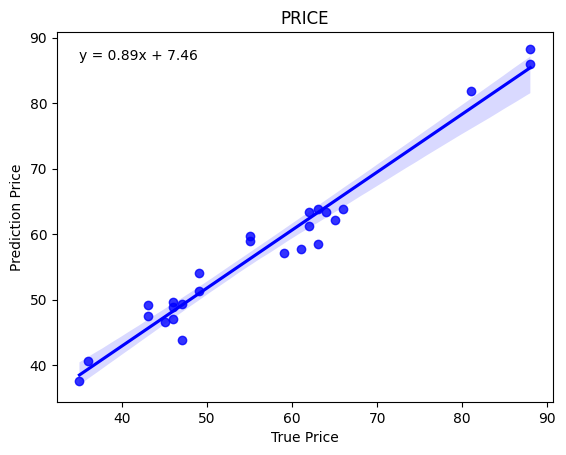

In [129]:
plt.figure()
sns.regplot(x=y_test, y=r_pred, scatter=True, color='b', label='Trend Line')
# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(y_test, r_pred, 1)

# Create the equation string
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x=min(y_test), y=max(r_pred), s=equation, ha='left', va='top')

plt.xlabel('True Price')
plt.ylabel('Prediction Price')
plt.title('PRICE');


#### Histogram of Residual

<AxesSubplot: xlabel='Price', ylabel='Count'>

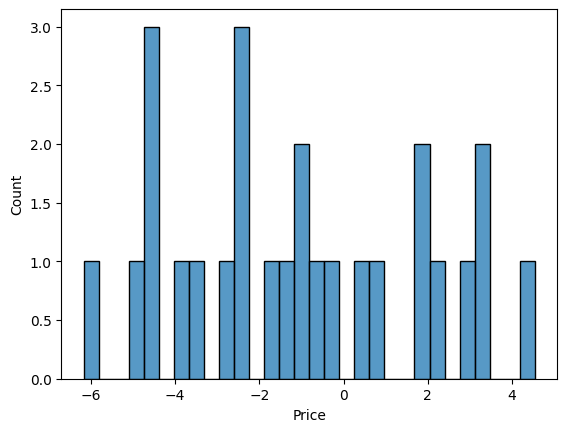

In [130]:
resd = y_test-r_pred
sns.histplot(resd, bins=30)

#### Feature importance

Text(0.5, 1.0, 'Feature Importance')

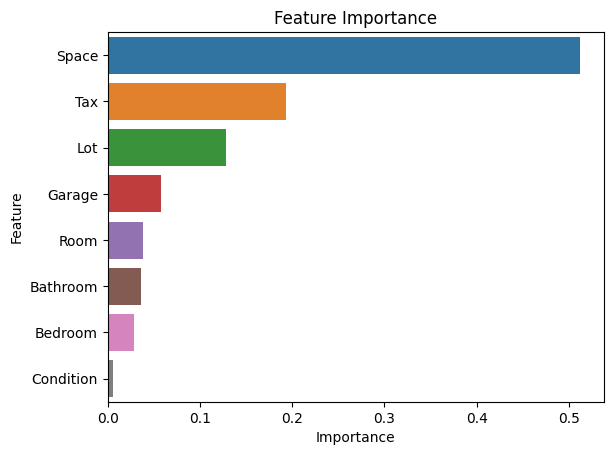

In [131]:
plt.figure()
# Get the feature names and importances
feature_names = rfr.feature_names_in_
importances = rfr.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Create the bar plot
sns.barplot(x=sorted_importances, y=sorted_names, orient='h')

# Set labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')


#### Space has the most relevant to the Price. 

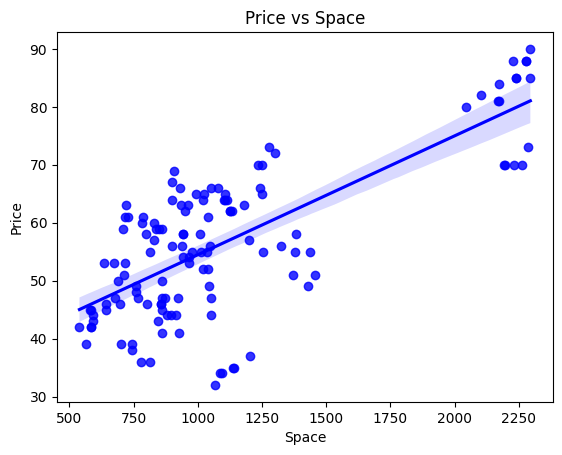

[CV] END ....learning_rate=1, max_depth=3, n_estimators=1500; total time=   0.5s
[CV] END .....learning_rate=1, max_depth=5, n_estimators=500; total time=   0.2s
[CV] END ....learning_rate=1, max_depth=5, n_estimators=1500; total time=   0.5s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=500; total time=   0.2s
[CV] END ....learning_rate=1, max_depth=7, n_estimators=1000; total time=   0.3s
[CV] END ....learning_rate=1, max_depth=7, n_estimators=1500; total time=   0.5s
[CV] END .....learning_rate=1, max_depth=9, n_estimators=500; total time=   0.2s
[CV] END ....learning_rate=1, max_depth=9, n_estimators=1500; total time=   0.5s
[CV] END ....learning_rate=1, max_depth=12, n_estimators=200; total time=   0.1s
[CV] END ....learning_rate=1, max_depth=12, n_estimators=500; total time=   0.2s
[CV] END ...learning_rate=1, max_depth=12, n_estimators=1000; total time=   0.3s
[CV] END ...learning_rate=1,

In [132]:
# scatter plot
sns.regplot(x=df2['Space'], y=df2['Price'], scatter=True, color='b', label='Trend Line')
plt.xlabel('Space')
plt.ylabel('Price')
plt.title('Price vs Space');